In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from utility import *

homedir = get_homedir()

In [2]:
from dtw import dtw

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [3]:
FIPS_mapping = get_FIPS()
FIPS_full = sorted(FIPS_mapping.keys())

In [4]:
confirmed_cases = pd.read_csv(f"{homedir}/data/us/covid/confirmed_cases.csv")
confirmed_cases.drop(["County Name", "State", "stateFIPS"], axis=1, inplace=True)
confirmed_cases["countyFIPS"]=confirmed_cases["countyFIPS"].apply(correct_FIPS)
confirmed_cases.head()

,countyFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,01001,0,0,0,0,0,0,0,0,0,...,12,12,12,12,17,17,19,19,19,19
2,01003,0,0,0,0,0,0,0,0,0,...,34,38,42,49,59,59,66,71,78,78
3,01005,0,0,0,0,0,0,0,0,0,...,2,3,3,3,7,9,10,10,9,9
4,01007,0,0,0,0,0,0,0,0,0,...,7,7,8,9,11,11,13,16,17,17


In [5]:
confirmed_cases = confirmed_cases[(confirmed_cases["countyFIPS"]!=0)]
confirmed_cases = confirmed_cases[(confirmed_cases["countyFIPS"]!=1)]
confirmed_cases.set_index("countyFIPS", inplace=True)
confirmed_cases.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20
countyFIPS,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01001,0,0,0,0,0,0,0,0,0,0,...,12,12,12,12,17,17,19,19,19,19
01003,0,0,0,0,0,0,0,0,0,0,...,34,38,42,49,59,59,66,71,78,78
01005,0,0,0,0,0,0,0,0,0,0,...,2,3,3,3,7,9,10,10,9,9
01007,0,0,0,0,0,0,0,0,0,0,...,7,7,8,9,11,11,13,16,17,17


In [6]:
timeline = confirmed_cases.columns.to_numpy().tolist()
timeline[:10]

['1/22/20',
 '1/23/20',
 '1/24/20',
 '1/25/20',
 '1/26/20',
 '1/27/20',
 '1/28/20',
 '1/29/20',
 '1/30/20',
 '1/31/20']

In [7]:
confirmed_cases.rename(columns={i:j for j,i in enumerate(timeline)}, inplace=True)
confirmed_cases.head()

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
countyFIPS,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01001,0,0,0,0,0,0,0,0,0,0,...,12,12,12,12,17,17,19,19,19,19
01003,0,0,0,0,0,0,0,0,0,0,...,34,38,42,49,59,59,66,71,78,78
01005,0,0,0,0,0,0,0,0,0,0,...,2,3,3,3,7,9,10,10,9,9
01007,0,0,0,0,0,0,0,0,0,0,...,7,7,8,9,11,11,13,16,17,17


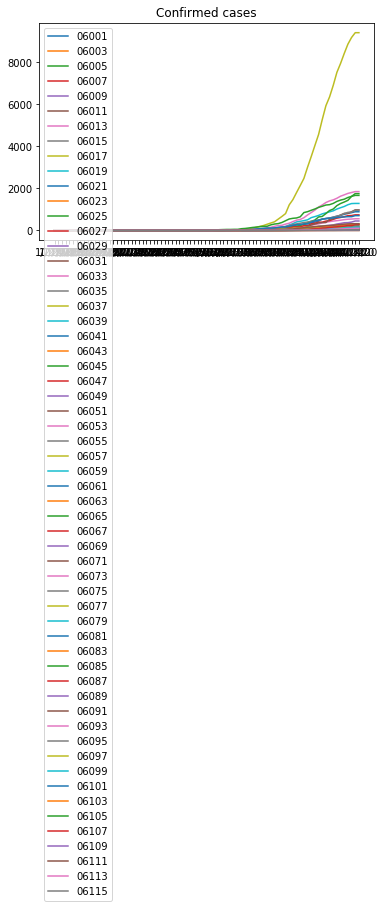

In [8]:
for fips in FIPS_full:
    if fips[:2]=='06': ## state code 06: CA
        plt.plot(timeline, confirmed_cases.loc[fips], label=fips)

plt.legend(loc='upper left')
plt.title("Confirmed cases")
plt.show()

In [9]:
berkeley = pd.read_csv(f'{homedir}/JK/df_county_level_cached.csv')
berkeley["Header-FIPSStandCtyCode"] = berkeley["Header-FIPSStandCtyCode"].apply(correct_FIPS)
berkeley.set_index("Header-FIPSStandCtyCode", inplace=True)
berkeley.drop(["Unnamed: 0", "id"], axis=1, inplace=True)
berkeley.head()

,EntityofFile,SecondaryEntityOfFile,DateofFile,DateofCreation,FileLength,StateName,StateNameAbbreviation,CountyName,CountyNamew/StateAbbrev,FIPSStateCode,...,Respiratory Mortality,dem_to_rep_ratio,#Hospitals,#ICU_beds,HeartDiseaseMortality,StrokeMortality,Smokers_Percentage,FracMale2017,#FTEHospitalTotal2017,mortality2015-17Estimated
Header-FIPSStandCtyCode,,,,,,,,,,,,,,,,,,,,,
01001,AHRF,1001,2019,19212.0,31661.0,Alabama,AL,Autauga,"Autauga, AL",1,...,81.79,0.326656,1,6,204.5,56.1,18.081557,0.486578,324.0,33.194755
01003,AHRF,1003,2019,19212.0,31661.0,Alabama,AL,Baldwin,"Baldwin, AL",1,...,54.28,0.253255,3,51,183.2,41.9,17.489033,0.485472,2101.0,148.887537
01005,AHRF,1005,2019,19212.0,31661.0,Alabama,AL,Barbour,"Barbour, AL",1,...,69.82,0.893106,1,5,220.4,49.0,21.999985,0.527701,181.0,18.483155
01007,AHRF,1007,2019,19212.0,31661.0,Alabama,AL,Bibb,"Bibb, AL",1,...,84.49,0.278124,1,0,225.5,57.2,19.114200,0.535469,145.0,15.381366
01009,AHRF,1009,2019,19212.0,31661.0,Alabama,AL,Blount,"Blount, AL",1,...,87.05,0.094317,1,6,224.8,52.8,19.208672,0.493114,103.0,48.499442


In [10]:
col_list = pd.read_csv(f"{homedir}/data/us/aggregate_berkeley.csv", index_col=0).columns.to_numpy().tolist()
berkeley[col_list].head()

,countyFIPS,State,County,PopulationEstimate2018,Population(Persons)2017,PopTotalMale2017,PopTotalFemale2017,FracMale2017,PopulationEstimate65+2017,PopulationDensityperSqMile2010,...,3-YrMortalityAge5-14Years2015-17,3-YrMortalityAge15-24Years2015-17,3-YrMortalityAge25-34Years2015-17,3-YrMortalityAge35-44Years2015-17,3-YrMortalityAge45-54Years2015-17,3-YrMortalityAge55-64Years2015-17,3-YrMortalityAge65-74Years2015-17,3-YrMortalityAge75-84Years2015-17,3-YrMortalityAge85+Years2015-17,mortality2015-17Estimated
Header-FIPSStandCtyCode,,,,,,,,,,,,,,,,,,,,,
01001,1001,Alabama,Autauga,55601.0,55504.0,27007.0,28497.0,0.486578,8392.0,91.8,...,0.0,0.0,10.0,20.0,44.0,73.0,112.0,143.0,109.0,33.194755
01003,1003,Alabama,Baldwin,218022.0,212628.0,103225.0,109403.0,0.485472,42413.0,114.7,...,0.0,23.0,30.0,52.0,125.0,262.0,434.0,546.0,597.0,148.887537
01005,1005,Alabama,Barbour,24881.0,25270.0,13335.0,11935.0,0.527701,4757.0,31.0,...,0.0,0.0,0.0,0.0,21.0,44.0,65.0,72.0,68.0,18.483155
01007,1007,Alabama,Bibb,22400.0,22668.0,12138.0,10530.0,0.535469,3632.0,36.8,...,0.0,0.0,0.0,0.0,24.0,37.0,62.0,56.0,45.0,15.381366
01009,1009,Alabama,Blount,57840.0,58013.0,28607.0,29406.0,0.493114,10351.0,88.9,...,0.0,10.0,13.0,25.0,49.0,94.0,150.0,182.0,142.0,48.499442


In [11]:
len(berkeley)

3114

3114